# Home Credit Indonesia Project Based Internship Program ( Data Science - Rakamin )
---
> Rakamin Virtual Internship Program Batch Oktober \
> Final Task Home Credit Scorecard Model \
> Create By Ghozi Alvin Karim.
---

# Library Python

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, auc, classification_report,
    confusion_matrix, precision_recall_fscore_support
)

# imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Dataset


In [ ]:
# Data ( application_{train})
# Data Train Dengan Target (Label 1/0)
dt_train = pd.read_csv('/content/drive/MyDrive/PBI (Rakamin)/DS ( HCI)/application_train.csv')
dt_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Data ( application_{test})
# Data Test
dt_test = pd.read_csv('/content/drive/MyDrive/PBI (Rakamin)/DS ( HCI)/application_test.csv')
dt_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


# Data Preprocessing

## Cleaning Data

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Data Duplicate
print("> Data Duplicate : ",dt_train.duplicated().sum())

> Data Duplicate :  0


In [ ]:
# Cek Missing Value

# Number of Missing Values ​Per Column
missing_count = dt_train.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(dt_train)) * 100

# Merge into a DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent
})
# Sort from the most missing
missing_summary = missing_summary[missing_summary['Missing Count'] > 0] \
    .sort_values(by='Missing Percent (%)', ascending=False)

print("> Missing Value Summary :")
missing_summary.head(20)

> Missing Value Summary :


,Missing Count,Missing Percent (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [ ]:
# # Delete all rows that have NaN values
dt_train_clean = dt_train.dropna()

print("="*40)
print("> Before deletion \t:", dt_train.shape)
print("> After deletion \t:", dt_train_clean.shape)
print("="*40)
print("> Remaining missing values ​​after cleaning:")
print(dt_train_clean.isnull().sum().sum(), "empty values")
print("="*40)
dt_train_clean

> Before deletion 	: (307511, 122)
> After deletion 	: (8602, 122)
> Remaining missing values ​​after cleaning:
0 empty values


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# Exploratory Data Analysis (EDA)

In [ ]:
# Check Column Categorical
categorical_columns = dt_train_clean.select_dtypes(include=['object', 'category']).columns.tolist()

cat_summary = pd.DataFrame({
    'Column Name': categorical_columns,
    'Unique Values': [dt_train_clean[col].nunique() for col in categorical_columns],
    'Sample Values': [dt_train_clean[col].unique()[:5] for col in categorical_columns]
})
cat_summary

,Column Name,Unique Values,Sample Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
1,CODE_GENDER,2,"[M, F]"
2,FLAG_OWN_CAR,1,[Y]
3,FLAG_OWN_REALTY,2,"[Y, N]"
4,NAME_TYPE_SUITE,7,"[Unaccompanied, Family, Spouse, partner, Child..."
5,NAME_INCOME_TYPE,3,"[Working, Commercial associate, State servant]"
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,5,"[Married, Separated, Single / not married, Wid..."
8,NAME_HOUSING_TYPE,6,"[House / apartment, With parents, Municipal ap..."
9,OCCUPATION_TYPE,18,"[Laborers, Managers, Drivers, Core staff, Sale..."


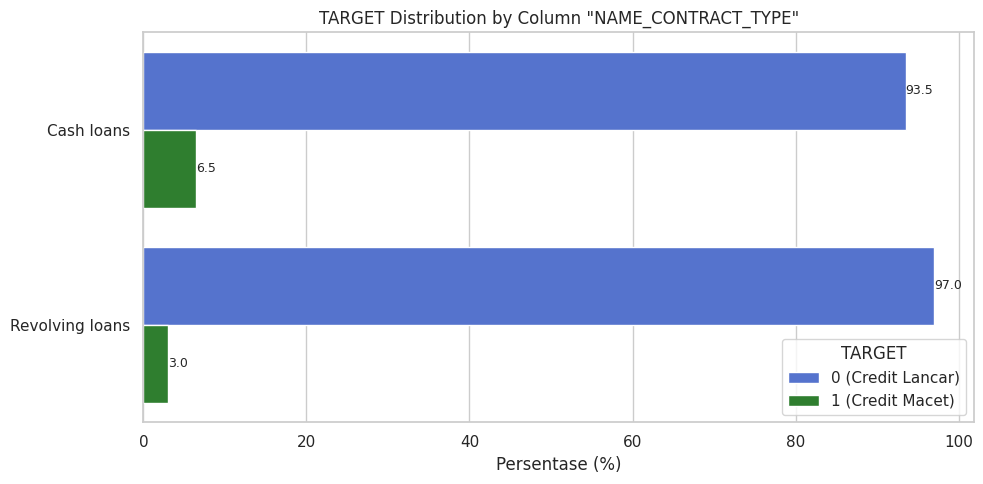

In [ ]:
# Functions for Visualization
def plot_cat_target(df, col, figsize=(10, 5)):
    """
    Plot horizontal percent-stacked bars of TARGET (0/1) per category of `col`.
    """
    sns.set(style="whitegrid")
    label_map = {0: '0 (Credit Lancar)', 1: '1 (Credit Macet)'}

    # prepare aggregated table
    tmp = (
        df[[col, 'TARGET']]
        .fillna('Unknown')
        .groupby([col, 'TARGET'])
        .size()
        .reset_index(name='count')
    )
    # use transform (not apply) so hasilnya aligned dengan tmp
    tmp['percent'] = tmp.groupby(col)['count'].transform(lambda x: 100 * x / x.sum())

    # order kategori berdasarkan total frekuensi (descending)
    order = tmp.groupby(col)['count'].sum().sort_values(ascending=False).index.tolist()

    # label legend
    tmp['TARGET_LABEL'] = tmp['TARGET'].map(label_map)
    hue_order = [label_map[0], label_map[1]]

    plt.figure(figsize=figsize)
    ax = sns.barplot(
        data=tmp,
        y=col,
        x='percent',
        hue='TARGET_LABEL',
        order=order,
        hue_order=hue_order,
        palette=['royalblue', 'forestgreen'],
        orient='h',
        ci=None
    )

    ax.set(title=f'TARGET Distribution by Column "{col}"', xlabel='Persentase (%)', ylabel='')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f', label_type='edge', fontsize=9)
    ax.legend(title='TARGET', loc='best')
    plt.tight_layout()
    plt.show()

# Plotting
plot_cat_target(dt_train_clean, 'NAME_CONTRACT_TYPE')

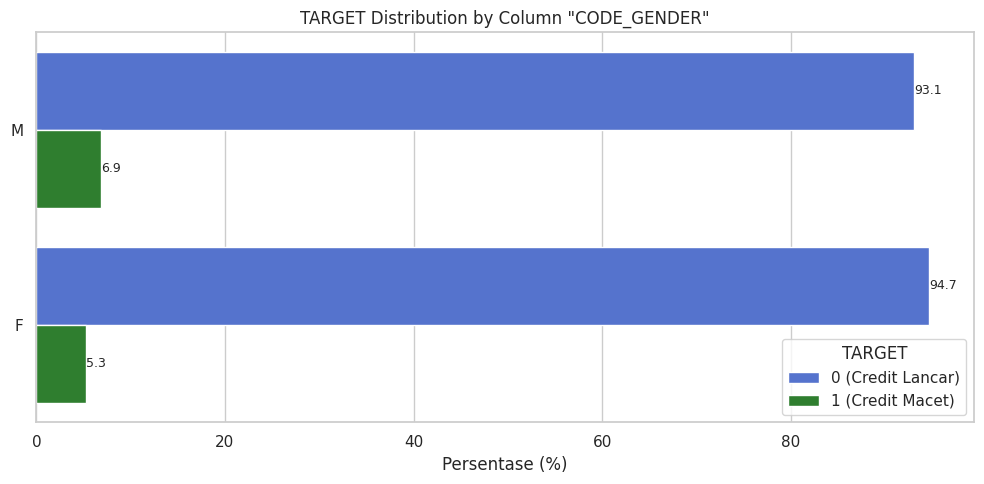

In [ ]:
plot_cat_target(dt_train_clean, 'CODE_GENDER')

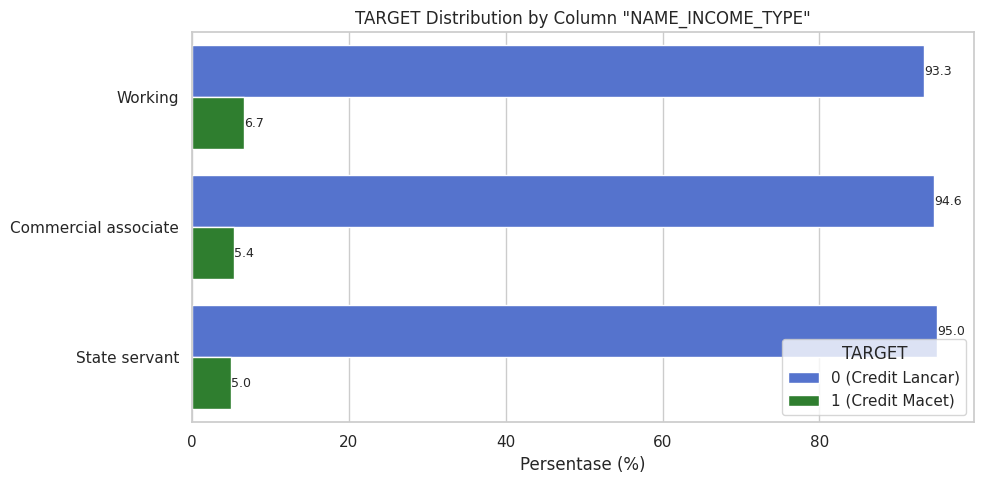

In [ ]:
plot_cat_target(dt_train_clean, 'NAME_INCOME_TYPE')

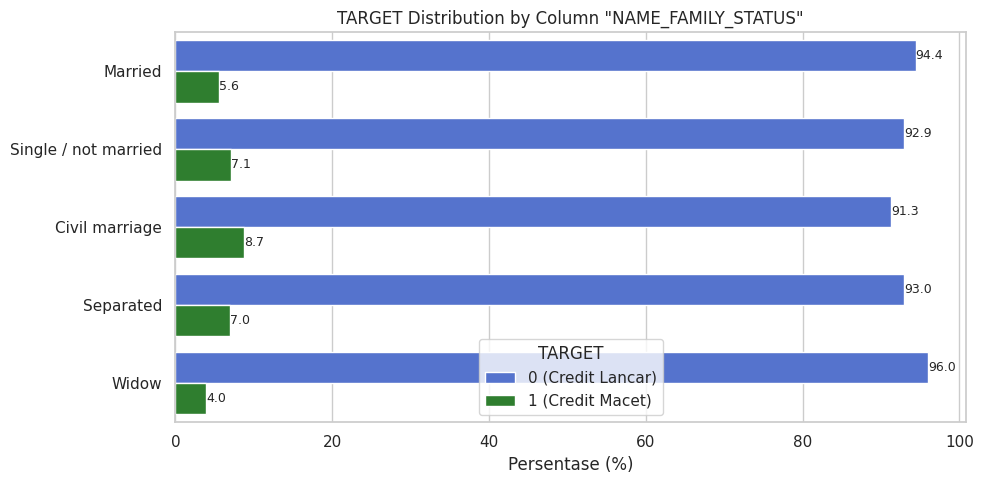

In [ ]:
plot_cat_target(dt_train_clean, 'NAME_FAMILY_STATUS')

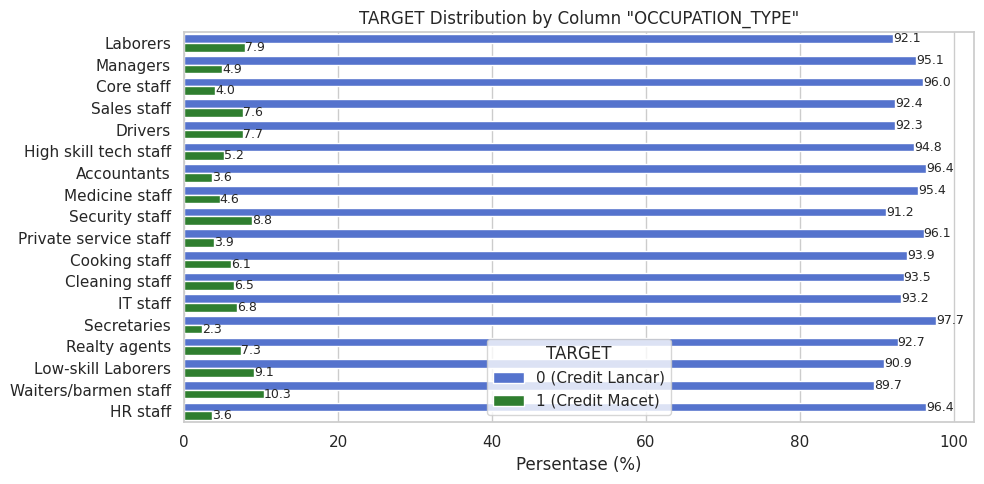

In [ ]:
plot_cat_target(dt_train_clean, 'OCCUPATION_TYPE')

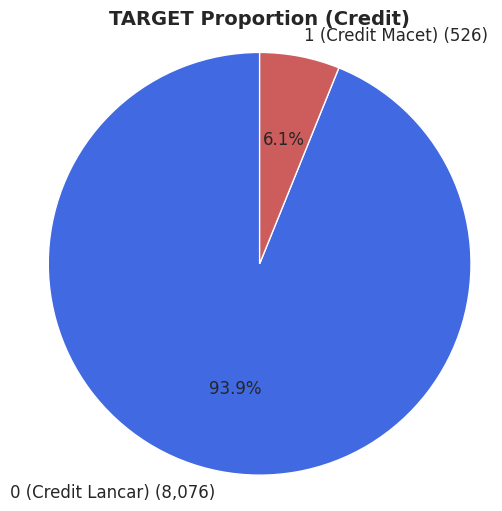

In [ ]:
# Count the number of each class and make sure index 0 and 1 exist
counts = dt_train_clean['TARGET'].fillna(-1).astype(int).value_counts().reindex([0,1], fill_value=0)

# Label that also displays the number
labels = [f"0 (Credit Lancar) ({counts[0]:,})", f"1 (Credit Macet) ({counts[1]:,})"]
colors = ['royalblue', 'indianred']

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize':12})
plt.title('TARGET Proportion (Credit)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

In [ ]:
# Input Column To Check contents
columns_to_check = ['NAME_INCOME_TYPE']

for col in columns_to_check:
    print(f"\nKolom: {col}")
    print(dt_train_clean[col].value_counts())


Kolom: NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 5050
Commercial associate    2836
State servant            716
Name: count, dtype: int64


# Modelling Classification

In [ ]:
# Define categorical columns (automatic)
categorical_cols = dt_train_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to be encoded:", categorical_cols)

mappings = {}

# change to consistent numeric code
for col in categorical_cols:
    train_cat = dt_train_clean[col].astype('category')
    mappings[col] = list(train_cat.cat.categories)
    train_codes = train_cat.cat.codes.replace(-1, pd.NA)
    dt_train_clean[col] = train_codes.astype('Int64')

    # If there is test data, transform using the train category (unseen => code -1)
    if 'dt_test_clean' in globals():
        test_codes = pd.Categorical(dt_test_clean[col], categories=mappings[col]).codes
        dt_test_clean[col] = pd.Series(test_codes).replace(-1, pd.NA).astype('Int64')

Categorical columns to be encoded: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
dt_train_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
df = dt_train_clean.copy()
print("Shape:", df.shape)
print("Columns sample:", df.columns[:20].tolist())
print("Target distribution:\n", df['TARGET'].value_counts(normalize=True))

Shape: (8602, 122)
Columns sample: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
Target distribution:
 TARGET
0    0.938851
1    0.061149
Name: proportion, dtype: float64


In [ ]:
# Drop ID / leakage
if 'SK_ID_CURR' in df.columns:
    df = df.drop(columns=['SK_ID_CURR'])

assert 'TARGET' in df.columns, "TARGET column not found!"

# Split features & target
X = df.drop(columns=['TARGET'])
y = df['TARGET'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (6881, 120) Test shape: (1721, 120)


In [ ]:
# Identify numeric & categorical features automatically
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Heuristik: treat low-cardinality numeric as categorical (e.g., FLAG_ columns)
for col in numeric_cols[:]:
    if X_train[col].nunique() <= 10:
        cat_cols.append(col)
        numeric_cols.remove(col)

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(cat_cols))

Numeric features: 64
Categorical features: 56


In [ ]:
# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
    # scaling will be applied after ColumnTransformer
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

# Pipelines (SMOTE moved AFTER preprocessing & scaling)
# Logistic: preprocessing -> scaling -> SMOTE -> classifier
logistic_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('scaler', StandardScaler()),        # scale numeric + encoded categorical
    ('smote', SMOTE(random_state=42)),   # now SMOTE receives numeric arrays
    ('clf', LogisticRegression(solver='saga', max_iter=5000, random_state=42))
])

# RandomForest: preprocessing -> (no scaler needed) -> classifier
rf_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Hyperparameter grids
logistic_param_grid = {
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 5],
    'clf__class_weight': [None, 'balanced']
}

rf_param_grid = {
    'clf__n_estimators': [200, 400],
    'clf__max_depth': [6, 12, None],
    'clf__min_samples_split': [2, 8],
    'clf__class_weight': [None, 'balanced']
}

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_grid = GridSearchCV(logistic_pipe, logistic_param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)

# Fit models
print("> Training Logistic Regression (with SMOTE after preprocessing)...")
log_grid.fit(X_train, y_train)
print("Best Logistic params:", log_grid.best_params_)
print("Best Logistic CV ROC AUC:", log_grid.best_score_)

print("> Training Random Forest...")
rf_grid.fit(X_train, y_train)
print("Best RF params:", rf_grid.best_params_)
print("Best RF CV ROC AUC:", rf_grid.best_score_)

> Training Logistic Regression (with SMOTE after preprocessing)...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic params: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__penalty': 'l2'}
Best Logistic CV ROC AUC: 0.7027016286390718
> Training Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF params: {'clf__class_weight': None, 'clf__max_depth': 6, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best RF CV ROC AUC: 0.6977639600731934



===== Evaluation: LogisticRegression =====
ROC AUC: 0.7303571428571429
Classification report:
               precision    recall  f1-score   support

           0     0.9653    0.7061    0.8156      1616
           1     0.1187    0.6095    0.1988       105

    accuracy                         0.7002      1721
   macro avg     0.5420    0.6578    0.5072      1721
weighted avg     0.9137    0.7002    0.7779      1721

Confusion matrix:
 [[1141  475]
 [  41   64]]
Precision: 0.1187, Recall: 0.6095, F1: 0.1988


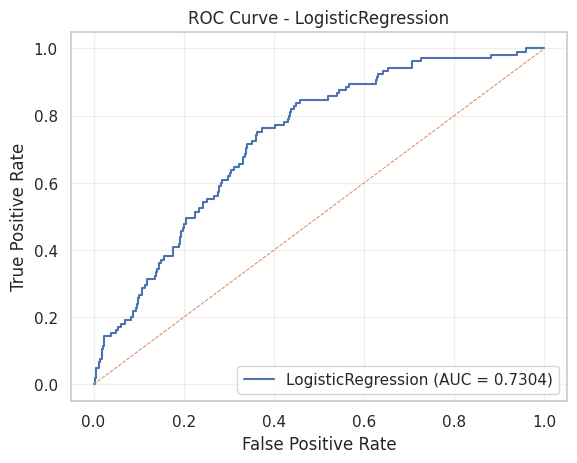

In [ ]:
# Evaluation function
def evaluate_model(grid, X_test, y_test, name="Model"):
    best = grid.best_estimator_
    y_proba = best.predict_proba(X_test)[:, 1]
    y_pred = best.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"\n===== Evaluation: {name} =====")
    print("ROC AUC:", roc_auc)
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_val = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_val:.4f})")
    plt.plot([0,1],[0,1],'--', linewidth=0.7)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    return {
        'model': best,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

results_log = evaluate_model(log_grid, X_test, y_test, name="LogisticRegression")


===== Evaluation: RandomForest =====
ROC AUC: 0.7153052805280529
Classification report:
               precision    recall  f1-score   support

           0     0.9390    1.0000    0.9685      1616
           1     0.0000    0.0000    0.0000       105

    accuracy                         0.9390      1721
   macro avg     0.4695    0.5000    0.4843      1721
weighted avg     0.8817    0.9390    0.9094      1721

Confusion matrix:
 [[1616    0]
 [ 105    0]]
Precision: 0.0000, Recall: 0.0000, F1: 0.0000


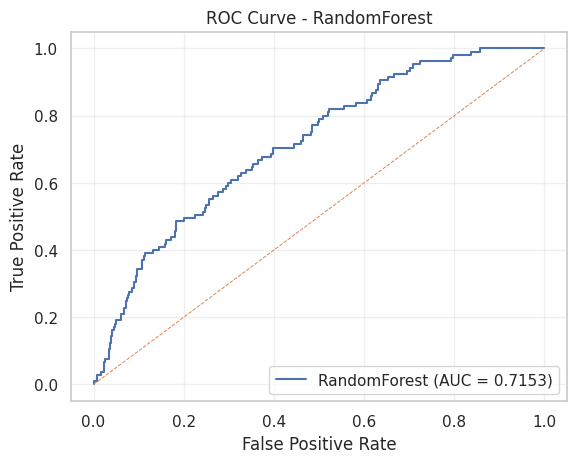

In [ ]:
results_rf = evaluate_model(rf_grid, X_test, y_test, name="RandomForest")

In [ ]:
# tentukan nama kolom target
target_col = 'TARGET'

# 1) Pastikan kolom target ada
if target_col not in dt_train_clean.columns:
    raise ValueError(f"Column '{target_col}' tidak ditemukan di dt_train_clean")

# 2) Pisahkan X dan y
X = dt_train_clean.drop(columns=[target_col]).copy()
y = dt_train_clean[target_col].astype(int).copy()   # pastikan 1-D int

# 3) Opsi: jika ada kolom non-numeric masih tersisa, convert/ drop (chi2 & scaler butuh numeric)
# Pastikan X hanya numeric
non_num = X.select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_num) > 0:
    print("Warning: Found non-numeric columns. Drop atau encode dulu:", non_num)
    # sederhana: drop non-numeric (lebih baik encode dulu sebelum feature selection)
    X = X.drop(columns=non_num)
    print("Dropped non-numeric columns for this pipeline.")

# 4) Scaling fitur (MinMax ke range 0..1) — chi2 membutuhkan nilai non-negatif
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)   # hasil numpy array

# 5) Pastikan k tidak lebih besar dari jumlah fitur
k = 10
n_features = X_scaled.shape[1]
if k > n_features:
    k = n_features
    print(f"Note: k lebih besar dari jumlah fitur; diset ke k={k}")

# 6) Feature selection menggunakan chi2
selector = SelectKBest(score_func=chi2, k=k)
X_reduced = selector.fit_transform(X_scaled, y)

# nama fitur terpilih (jika X awal kolom preserved)
selected_mask = selector.get_support()
selected_feature_names = np.array(X.columns)[selected_mask].tolist()
print("Selected features (chi2):", selected_feature_names)

# 7) Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# 8) Train logistic regression (pakai solver liblinear untuk dataset kecil/medium)
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 9) Predict & evaluasi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.4f}")

if y_proba is not None:
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC: {auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Dropped non-numeric columns for this pipeline.
Selected features (chi2): ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16']
Akurasi: 0.6769
AUC-ROC: 0.7382

Confusion Matrix:
[[1099  517]
 [  39   66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1616
           1       0.11      0.63      0.19       105

    accuracy                           0.68      1721
   macro avg       0.54      0.65      0.49      1721
weighted avg       0.91      0.68      0.76      1721

